<a href="https://colab.research.google.com/github/ajk7196/Cricket_score_board/blob/main/CP_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [58]:
import pandas as pd
import numpy as np

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
working_dir_path = '/content/drive/MyDrive/data science/Hotel Bookings.csv'
df = pd.read_csv(working_dir_path)

In [61]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

          index  hotel
0    City Hotel  79330
1  Resort Hotel  40060


<function matplotlib.pyplot.show>

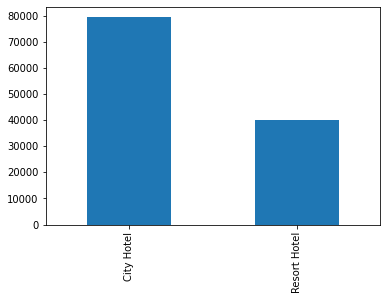

In [63]:
print(df['hotel'].value_counts().reset_index())
df['hotel'].value_counts().plot(kind='bar')
plt.show

In [64]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

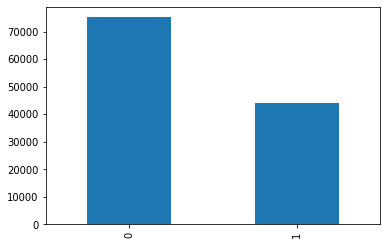

In [65]:
# is_canceled Bar Plot
df['is_canceled'].value_counts().plot(kind='bar')

In [66]:
df.groupby(['is_canceled']).sum()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,,,,,,,,,,,,,,,,,,,
0,6012129,151545744,2035506,1190594,69827,185213,137534,7693.0,780,3258,1187,15257,22051,5911971.0,1068051.0,119504,7515674.93,7464,53673
1,6405794,89163187,1207744,695558,40919,113298,84102,4710.0,169,552,9214,1111,4349,3021782.0,218395.0,157618,4641942.67,0,14542


In [67]:
df.groupby(['is_canceled'])['required_car_parking_spaces'].sum().reset_index()

,is_canceled,required_car_parking_spaces
0,0,7464
1,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


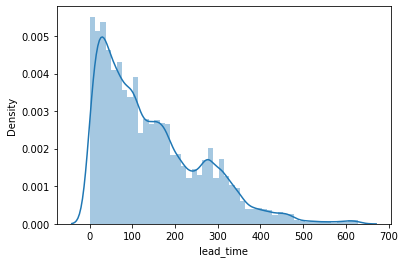

In [99]:
sns.distplot(df.loc[df['is_canceled']==1,'lead_time'])

In [100]:
df.loc[df['is_canceled']==1,'lead_time'].describe()

count    44224.000000
mean       144.848815
std        118.624829
min          0.000000
25%         48.000000
50%        113.000000
75%        214.000000
max        629.000000
Name: lead_time, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


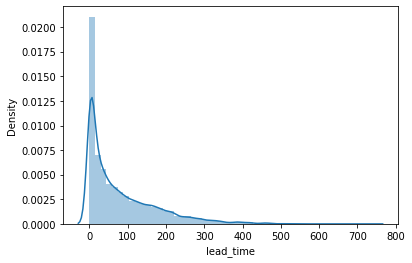

In [102]:
sns.distplot(df.loc[df['is_canceled']==0,'lead_time'])

In [101]:
df.loc[df['is_canceled']==0,'lead_time'].describe()

count    75166.000000
mean        79.984687
std         91.109888
min          0.000000
25%          9.000000
50%         45.000000
75%        124.000000
max        737.000000
Name: lead_time, dtype: float64

In [68]:
# Lead time description and distribution plot
df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [69]:
df[df['lead_time']>500].count()

hotel                             481
is_canceled                       481
lead_time                         481
arrival_date_year                 481
arrival_date_month                481
arrival_date_week_number          481
arrival_date_day_of_month         481
stays_in_weekend_nights           481
stays_in_week_nights              481
adults                            481
children                          481
babies                            481
meal                              481
country                           481
market_segment                    481
distribution_channel              481
is_repeated_guest                 481
previous_cancellations            481
previous_bookings_not_canceled    481
reserved_room_type                481
assigned_room_type                481
booking_changes                   481
deposit_type                      481
agent                             479
company                             0
days_in_waiting_list              481
customer_typ

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


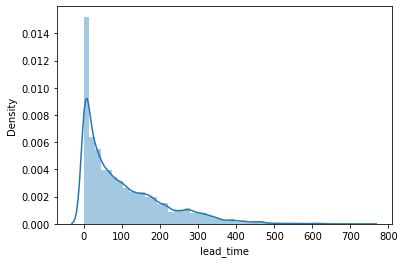

In [70]:
sns.distplot(df['lead_time'])
plt.show()

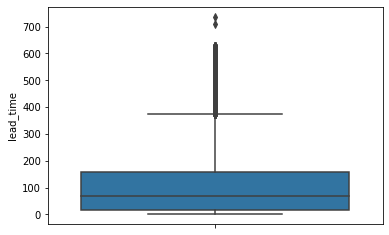

In [88]:
sns.boxplot( y= df['lead_time'])

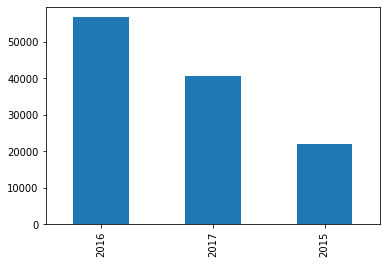

In [90]:
# Arrival date year bar plot

df['arrival_date_year'].value_counts().plot(kind='bar')

In [106]:
year_by_month = df.groupby(df['arrival_date_month'])
year_by_month

AttributeError: ignored

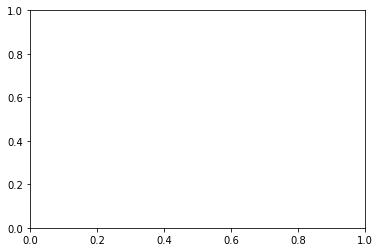

In [107]:
year_by_month.plot(kind='bar', hue='arrival_date_year')

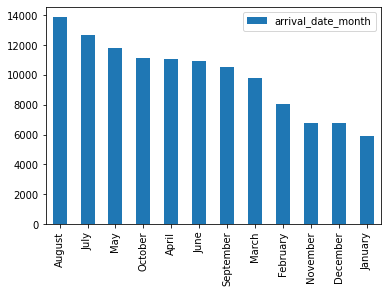

In [84]:
# Arrival date month bar plot

df['arrival_date_month'].value_counts().plot(kind='bar', label='arrival_date_month')
plt.legend()

In [ ]:
# Arrival date week bar plot

df['arrival_date_week_number'].value_counts().plot(kind='bar')

In [ ]:
df.groupby(df['arrival_date_year'])['arrival_date_month'].sum()

In [ ]:
df['country'].isna().value_counts()

In [ ]:
df['country'].value_counts()

In [ ]:
df['country'].fillna('PRT', inplace = True)

In [ ]:
df['country'].isnull().value_counts()

In [ ]:
df['agent'].describe()

In [ ]:
df.agent.fillna(14, inplace= True)

In [ ]:
df.company.isna().value_counts()

In [ ]:
df.country.value_counts().reset_index().head(30)

In [ ]:
df[df.isna().any(axis=1)]

In [ ]:
result = df.groupby(['country']).sum()
result

In [ ]:
country_df = df.country.value_counts().reset_index()
country_df 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['is_canceled'].value_counts().plot(kind='bar')

In [ ]:
# df['adr'].max()
df['adr'].describe()

In [ ]:
sns.distplot(df['adr'])
# plt.xticks([-10,0,100,200,300])


In [ ]:
idx = df.loc[df['adr']==5400].index

In [ ]:
df.iloc[idx]['adr'].replace(100, inplace = True)

In [ ]:
df.iloc[idx]

In [ ]:
df.at[idx,'adr'] = 100

In [ ]:
df['lead_time']